In [72]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

from IPython.core.display import display, HTML
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import random
from string import Template
import json
import sys 
sys.path.append('..')
# coEgoNetworks
import src.coegonets as cnets
import src.notebook as nb

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [73]:
STYLE='bmh'
plt.style.use(STYLE)
font = {'family' : 'normal',
        'size'   : 12}
mpl.rc('font', **font)
mpl.rc('legend',fontsize=12)
mpl.rc('xtick',labelsize=12)
mpl.rc('ytick',labelsize=12)
mpl.rc('axes',facecolor="white",labelsize=12)
# mpl.rc('text', usetex=True)
PLOT_WIDTH  = 14
PLOT_HEIGHT = 7

In [101]:
#Read data and filter by target word
DATA_PATH="../DATA/txt/wellness_all"
target_word="#wellness"
secondary_target="#yoga"

T = cnets.read_data(DATA_PATH, filter_all=[target_word,secondary_target])
cooc_normalizer = len(T)
print(cooc_normalizer)


4560


In [102]:
#build matrix
k, v = cnets.build_COOM(T)
C = cnets.getDF(k, v)
C

 > processed 4559\4560 docs | 30671 tokens
 > done


,[COUNTS],#online,#yoga,#divine,#wellness,#fitness,#health,#fitblog,#vinyasa,#ashtanga,...,#sanaazesty,#steemhunt,#sleepingmusic,#heartfulness,#90daysofheartfulness,#prayer,#speaker,#fark,#30fifteen,#mindfuleating
[COUNTS],0,2,4560,2,4560,2315,2841,1,11,4,...,1,1,2,2,2,2,1,1,1,1
#online,2,0,2,2,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
#yoga,4560,2,0,2,4560,2315,2841,1,11,4,...,1,1,2,2,2,2,1,1,1,1
#divine,2,2,2,0,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
#wellness,4560,2,4560,2,0,2315,2841,1,11,4,...,1,1,2,2,2,2,1,1,1,1
#fitness,2315,0,2315,0,2315,0,2085,1,6,1,...,0,1,0,0,0,0,0,0,0,0
#health,2841,0,2841,0,2841,2085,0,1,2,2,...,1,0,0,0,0,0,1,0,1,0
#fitblog,1,0,1,0,1,1,1,0,1,1,...,0,0,0,0,0,0,0,0,0,0
#vinyasa,11,0,11,0,11,6,2,1,0,1,...,0,0,0,0,0,0,0,0,0,0
#ashtanga,4,0,4,0,4,1,2,1,1,0,...,0,0,0,0,0,0,0,0,0,0


Text(0.5, 0.98, 'Top 10 Hashtag Frequency')

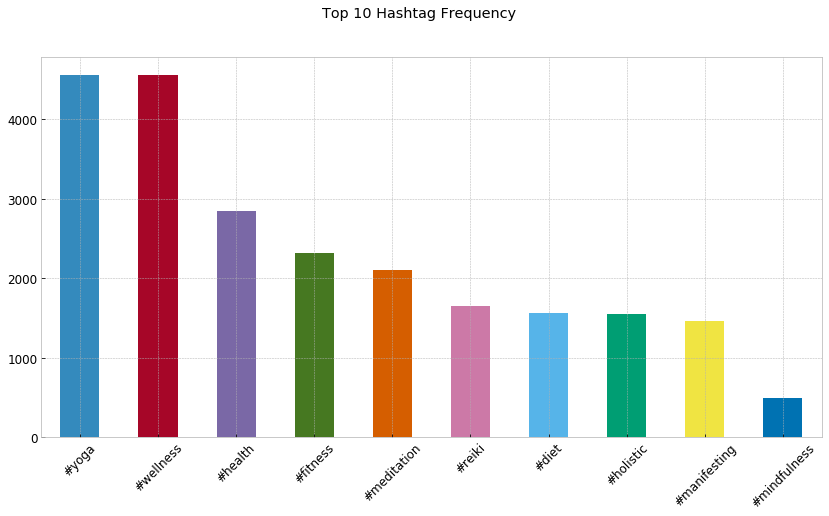

In [103]:
#top K occurrences
K=10
oc = nb.top_k(C, K)
f,ax = plt.subplots(1,1,figsize=(PLOT_WIDTH,PLOT_HEIGHT),sharey=True)
oc.plot(ax=ax,kind="bar", rot=45)
f.suptitle("Top {} Hashtag Frequency".format(K))

Text(0.5, 0.98, '#wellness: top 10 coocurrences')

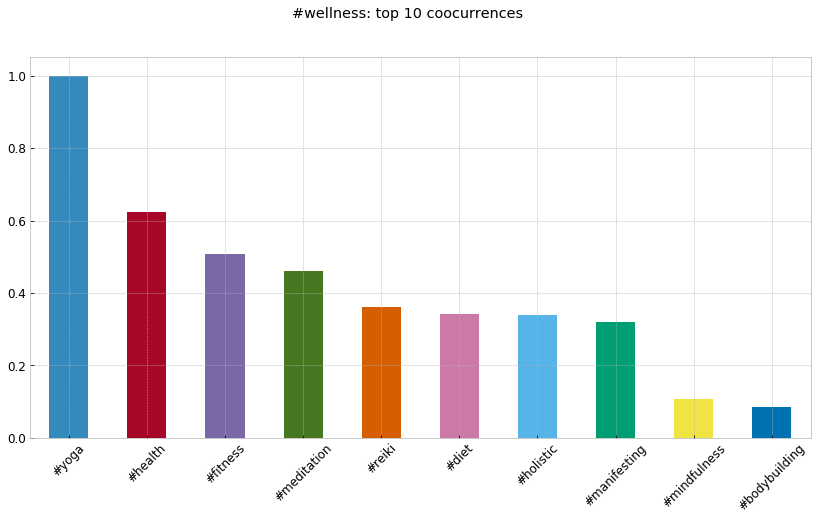

In [104]:
#top K co-occurrences
cooc = nb.top_k_cooc(C,target_word,K, normalizer=cooc_normalizer)
f,ax = plt.subplots(1,1,figsize=(PLOT_WIDTH,PLOT_HEIGHT),sharey=True)
cooc.plot(ax=ax,kind="bar", rot=45)
f.suptitle("{}: top {} coocurrences".format(target_word, K))

In [105]:
# load javascript for sigma JS 
HTML('''<script src="./js/sigma.min.js"></script>
<script src="./js/sigma.layout.forceAtlas2.min.js"></script>
<script src="./js/sigma.renderers.snapshot.min.js"></script>
<script src="./js/sigma.exporters.svg.min.js"></script>
<script src="./js/sigma.renderers.parallelEdges.min.js"></script>
<script src="./js/sigma.plugins.dragNodes.min.js"></script>
''')

In [106]:
#plot top co-occurrences
top_words = list(cooc.keys())
graph = nb.graph(C, top_words, target_word, top_k_edges=None, style=STYLE)
g = nb.sigmaJSGraph(graph) 
HTML(g) 